In [1]:
import os
import pandas as pd

entity_df = pd.read_parquet("./combined_index_results/graphrag/index_graphrag_llama3v1_combined_top_1/create_final_nodes.parquet")
entity_embedding_df = pd.read_parquet("./combined_index_results/graphrag/index_graphrag_llama3v1_combined_top_1/create_final_entities.parquet")

In [2]:
relationship_df =  pd.read_parquet("./combined_index_results/graphrag/index_graphrag_llama3v1_combined_top_1/create_final_relationships.parquet")

In [3]:
relationship_df

,source,target,weight,description,text_unit_ids,id,human_readable_id,source_degree,target_degree,rank
0,"""PULMONARY CONSOLIDATION""","""PNEUMONIA""",2.0,"""Pulmonary Consolidation is a necessary condit...",[409825383487bc47a51c1a2ca9cd4863],8fe58de8a04f4f8f807c77fb41829a3a,0,15,10,25
1,"""PULMONARY CONSOLIDATION""","""PULMONARY EDEMA""",2.0,"""Pulmonary Edema is a contributing factor to P...",[409825383487bc47a51c1a2ca9cd4863],a9f50861273c4bb697d868a9d049d392,1,15,1,16
2,"""PULMONARY CONSOLIDATION""","""INFLAMMATORY EXUDATE""",2.0,"""Inflammatory Exudate contributes to Pulmonary...",[409825383487bc47a51c1a2ca9cd4863],be4820f29fd942b282049fa49697b4ed,2,15,1,16
3,"""PULMONARY CONSOLIDATION""","""PUS""",2.0,"""Pus is a contributing factor to Pulmonary Con...",[409825383487bc47a51c1a2ca9cd4863],6deaefe707f84b3dbda979dea0d095ac,3,15,1,16
4,"""PULMONARY CONSOLIDATION""","""INHALED WATER""",2.0,"""Inhaled Water is a contributing factor to Pul...",[409825383487bc47a51c1a2ca9cd4863],d053ea9432a24fb192e8d6aa993b0caa,4,15,1,16
...,...,...,...,...,...,...,...,...,...,...
652,"""UPPER LIMB INJURY""","""FALL ONTO AN OUTSTRETCHED HAND""",1.0,"""upper limb injury and fall onto an outstretch...",[55c6f568cf10a51a30fd809fc115d735],f8fd3fcf650b47b2b1692506ebe77762,652,3,3,6
653,"""UPPER LIMB INJURY""","""LOWER LIMB INJURY""",1.0,"""upper limb injury and lower limb injury are c...",[55c6f568cf10a51a30fd809fc115d735],d95acc24180c47caa34114627d501592,653,3,2,5
654,"""UPPER LIMB INJURY""","""FOOT AND ANKLE INJURY""",1.0,"""upper limb injury and foot and ankle injury a...",[55c6f568cf10a51a30fd809fc115d735],f4753ab09adc42a9a52754e95440d4b9,654,3,2,5
655,"""FALL ONTO AN OUTSTRETCHED HAND""","""LOWER LIMB INJURY""",1.0,"""fall onto an outstretched hand and lower limb...",[55c6f568cf10a51a30fd809fc115d735],12f5a7c56b454a3d8aae97f65908f96b,655,3,2,5


In [4]:
final_community_df = pd.read_parquet("./combined_index_results/graphrag/index_graphrag_llama3v1_combined_top_1/create_final_communities.parquet")

In [5]:
set(list(entity_df['id'])).difference(set(list(entity_embedding_df['id']))), set(list(entity_embedding_df['id'])).difference(set(list(entity_df['id'])))

(set(), set())

In [6]:
len(entity_embedding_df)

628

In [7]:
len(entity_embedding_df)

628

In [8]:
entity_embedding_df

,id,name,type,description,human_readable_id,graph_embedding,text_unit_ids,description_embedding
0,b45241d70f0e43fca764df95b2b81f77,"""PULMONARY CONSOLIDATION""","""DISEASE""","""Pulmonary Consolidation is a condition where ...",0,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.2294921875, -1.6875, 1.75, -1.1640625, 0.9..."
1,4119fd06010c494caa07f439b333f4c5,"""PNEUMONIA""","""DISEASE""","Pneumonia is a condition affecting the lungs, ...",1,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.328125, -1.515625, -0.310546875, 0.3378906..."
2,d3835bf3dda84ead99deadbeac5d0d7d,"""PULMONARY EDEMA""","""SYMPTOM""","The entity in question is ""PULMONARY EDEMA."" \...",2,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.6328125, -0.796875, 1.0078125, -0.05859375..."
3,077d2820ae1845bcbb1803379a3d1eae,"""INFLAMMATORY EXUDATE""","""SYMPTOM""","""Inflammatory Exudate is a type of cellular ex...",3,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.94140625, -1.390625, 3.078125, -0.8671875,..."
4,3671ea0dd4e84c1a9b02c5ab2c8f4bac,"""PUS""","""SYMPTOM""","""Pus is a type of liquid that can accumulate i...",4,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.71875, -1.4140625, 3.234375, -1.4453125, 0..."
...,...,...,...,...,...,...,...,...
623,50eabc166e8944a49197e79c32f27597,"""PULMONARY VALVE PROLAPSE""","""DISEASE""","""pulmonary valve prolapse is a condition where...",623,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-0.6875, -2.78125, 4.5, -2.40625, 0.6171875, ..."
624,5197a3fb02ef4677abd1900aa87e4efa,"""PULMONARY VALVE STENOSIS""","""DISEASE""","""pulmonary valve stenosis is a condition where...",624,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-1.609375, -0.0311279296875, 1.6484375, -0.08..."
625,887f444240bb474da23cdfb6abf7a998,"""PULMONARY VALVE REGURGITATION""","""DISEASE""","""pulmonary valve regurgitation is a condition ...",625,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-1.7578125, 0.1572265625, 1.453125, -0.417968..."
626,5d29053f2ce74442aa1855b327ef3bb7,"""EDITORIAL BOARD""","""ORGANIZATION""","""Editorial Board is a group of medical profess...",626,NaN,[4b11e1ecc3966801dcb9328ec5ae9b32],"[-0.333984375, -0.74609375, 0.546875, -0.95703..."


In [9]:
dict(entity_df.iloc[0])

{'level': 0,
 'title': '"PULMONARY CONSOLIDATION"',
 'type': '"DISEASE"',
 'description': '"Pulmonary Consolidation is a condition where a region of normally compressible lung tissue has filled with liquid instead of air, marked by induration, swelling, or hardening of normally soft tissue."',
 'source_id': '409825383487bc47a51c1a2ca9cd4863',
 'community': '4',
 'degree': 15,
 'human_readable_id': 0,
 'id': 'b45241d70f0e43fca764df95b2b81f77',
 'size': 15,
 'graph_embedding': nan,
 'entity_type': None,
 'top_level_node_id': 'b45241d70f0e43fca764df95b2b81f77',
 'x': 0,
 'y': 0}

In [10]:
entity_df['community'].value_counts()

community
0     111
1      78
5      68
7      67
6      43
4      38
3      28
11     15
13     15
15     13
2       7
10      7
12      6
8       2
14      2
9       2
16      2
Name: count, dtype: int64

In [11]:
entity_embedding_df

,id,name,type,description,human_readable_id,graph_embedding,text_unit_ids,description_embedding
0,b45241d70f0e43fca764df95b2b81f77,"""PULMONARY CONSOLIDATION""","""DISEASE""","""Pulmonary Consolidation is a condition where ...",0,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.2294921875, -1.6875, 1.75, -1.1640625, 0.9..."
1,4119fd06010c494caa07f439b333f4c5,"""PNEUMONIA""","""DISEASE""","Pneumonia is a condition affecting the lungs, ...",1,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.328125, -1.515625, -0.310546875, 0.3378906..."
2,d3835bf3dda84ead99deadbeac5d0d7d,"""PULMONARY EDEMA""","""SYMPTOM""","The entity in question is ""PULMONARY EDEMA."" \...",2,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.6328125, -0.796875, 1.0078125, -0.05859375..."
3,077d2820ae1845bcbb1803379a3d1eae,"""INFLAMMATORY EXUDATE""","""SYMPTOM""","""Inflammatory Exudate is a type of cellular ex...",3,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.94140625, -1.390625, 3.078125, -0.8671875,..."
4,3671ea0dd4e84c1a9b02c5ab2c8f4bac,"""PUS""","""SYMPTOM""","""Pus is a type of liquid that can accumulate i...",4,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.71875, -1.4140625, 3.234375, -1.4453125, 0..."
...,...,...,...,...,...,...,...,...
623,50eabc166e8944a49197e79c32f27597,"""PULMONARY VALVE PROLAPSE""","""DISEASE""","""pulmonary valve prolapse is a condition where...",623,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-0.6875, -2.78125, 4.5, -2.40625, 0.6171875, ..."
624,5197a3fb02ef4677abd1900aa87e4efa,"""PULMONARY VALVE STENOSIS""","""DISEASE""","""pulmonary valve stenosis is a condition where...",624,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-1.609375, -0.0311279296875, 1.6484375, -0.08..."
625,887f444240bb474da23cdfb6abf7a998,"""PULMONARY VALVE REGURGITATION""","""DISEASE""","""pulmonary valve regurgitation is a condition ...",625,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-1.7578125, 0.1572265625, 1.453125, -0.417968..."
626,5d29053f2ce74442aa1855b327ef3bb7,"""EDITORIAL BOARD""","""ORGANIZATION""","""Editorial Board is a group of medical profess...",626,NaN,[4b11e1ecc3966801dcb9328ec5ae9b32],"[-0.333984375, -0.74609375, 0.546875, -0.95703..."


In [12]:
dict(entity_embedding_df.iloc[0])

{'id': 'b45241d70f0e43fca764df95b2b81f77',
 'name': '"PULMONARY CONSOLIDATION"',
 'type': '"DISEASE"',
 'description': '"Pulmonary Consolidation is a condition where a region of normally compressible lung tissue has filled with liquid instead of air, marked by induration, swelling, or hardening of normally soft tissue."',
 'human_readable_id': 0,
 'graph_embedding': nan,
 'text_unit_ids': ['409825383487bc47a51c1a2ca9cd4863'],
 'description_embedding': [-0.2294921875,
  -1.6875,
  1.75,
  -1.1640625,
  0.9375,
  2.015625,
  -0.1640625,
  0.302734375,
  -0.72265625,
  -0.5546875,
  -0.384765625,
  -0.5859375,
  1.5,
  2.09375,
  -0.39453125,
  0.84765625,
  -0.416015625,
  1.2109375,
  -1.0546875,
  -0.201171875,
  0.53515625,
  -0.86328125,
  0.4453125,
  0.20703125,
  1.1953125,
  -0.78125,
  -0.0301513671875,
  0.455078125,
  0.173828125,
  1.7890625,
  0.4765625,
  2.015625,
  -0.1474609375,
  2.34375,
  4.34375,
  1.8515625,
  -0.28515625,
  -1.03125,
  0.62890625,
  -1.03125,
  -0.

In [13]:
entity_embedding_df.head(5)

,id,name,type,description,human_readable_id,graph_embedding,text_unit_ids,description_embedding
0,b45241d70f0e43fca764df95b2b81f77,"""PULMONARY CONSOLIDATION""","""DISEASE""","""Pulmonary Consolidation is a condition where ...",0,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.2294921875, -1.6875, 1.75, -1.1640625, 0.9..."
1,4119fd06010c494caa07f439b333f4c5,"""PNEUMONIA""","""DISEASE""","Pneumonia is a condition affecting the lungs, ...",1,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.328125, -1.515625, -0.310546875, 0.3378906..."
2,d3835bf3dda84ead99deadbeac5d0d7d,"""PULMONARY EDEMA""","""SYMPTOM""","The entity in question is ""PULMONARY EDEMA."" \...",2,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.6328125, -0.796875, 1.0078125, -0.05859375..."
3,077d2820ae1845bcbb1803379a3d1eae,"""INFLAMMATORY EXUDATE""","""SYMPTOM""","""Inflammatory Exudate is a type of cellular ex...",3,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.94140625, -1.390625, 3.078125, -0.8671875,..."
4,3671ea0dd4e84c1a9b02c5ab2c8f4bac,"""PUS""","""SYMPTOM""","""Pus is a type of liquid that can accumulate i...",4,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.71875, -1.4140625, 3.234375, -1.4453125, 0..."


In [14]:
entity_embedding_df.merge(entity_df, on='id', how='left')['community'].value_counts()

community
0     111
1      78
5      68
7      67
6      43
4      38
3      28
13     15
11     15
15     13
2       7
10      7
12      6
8       2
9       2
14      2
16      2
Name: count, dtype: int64

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
# %pip install scikit-learn

# Merge entity_df with entity_embedding_df on 'id'
merged_df = entity_embedding_df.merge(entity_df, on='id', how='left')

# Extract embeddings and reduce dimensions using t-SNE
embeddings = np.vstack(merged_df['description_embedding'].to_numpy())
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(embeddings)

# Add t-SNE coordinates to the dataframe
merged_df['x'] = reduced_embeddings[:, 0]
merged_df['y'] = reduced_embeddings[:, 1]

# Create a NetworkX graph
G = nx.Graph()

communities_added = []
# Add nodes with attributes
for _, row in merged_df.iterrows():
    communities_added.append(row['community'])
    G.add_node(row['id'], pos=(row['x'], row['y']), community=row['community'], type=row['type_x'])

# Optionally add edges if you have a relationship table
# For now, we assume no edges are provided

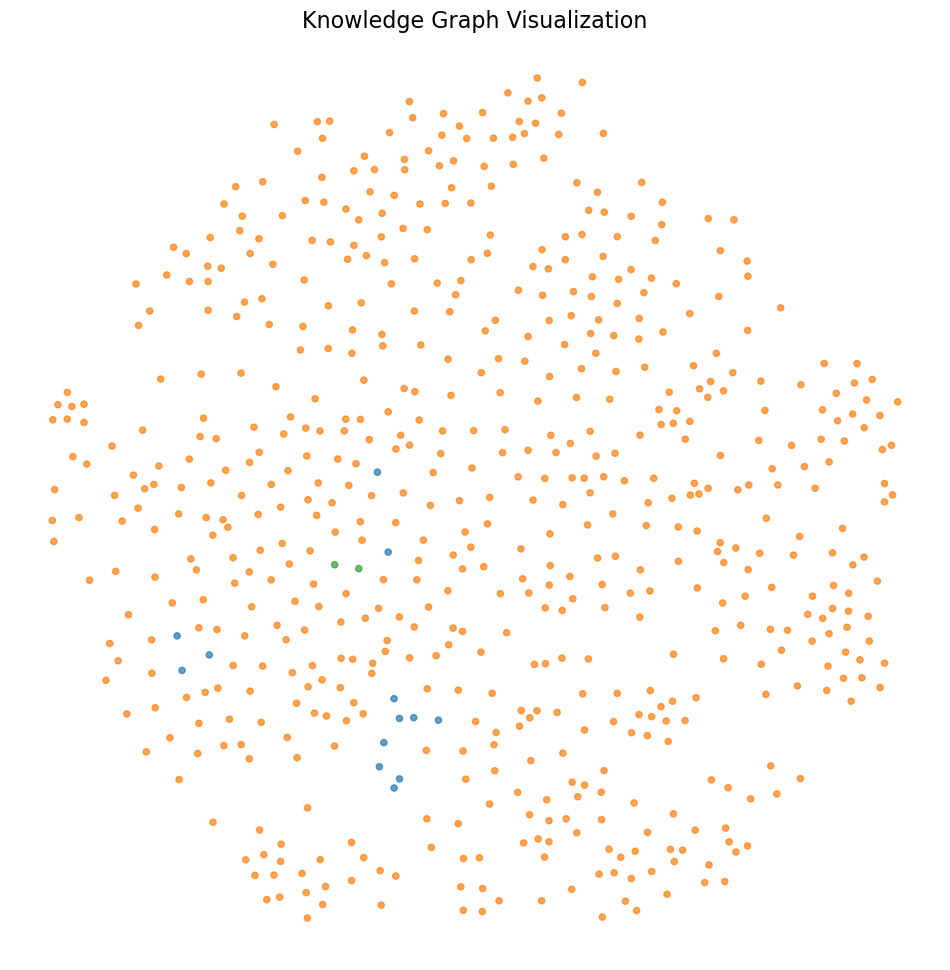

In [16]:
# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.get_node_attributes(G, 'pos')
communities = nx.get_node_attributes(G, 'community')

# Get unique communities and assign colors
unique_communities = list(set(communities.values()))
community_colors = {comm: plt.cm.tab10(i % 10) for i, comm in enumerate(unique_communities)}

# Draw nodes with community colors
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=[community_colors[communities[node]] for node in G.nodes()],
    node_size=20,
    alpha=0.7
)

# Remove axis for cleaner visualization
plt.axis('off')
plt.title("Knowledge Graph Visualization", fontsize=16)
plt.show()


In [17]:
communities = nx.get_node_attributes(G, 'community')

In [18]:
len(set(entity_df['id']))

628

In [19]:
row_dicts = []
for idx, row in entity_embedding_df.iterrows():
    row_dict = dict(row)
    # find the matching in entity_df through id
    matching_row = entity_df[entity_df['id'] == row['id']]
    matching_community = list(matching_row['community'])
    row_dict['communities'] = matching_community
    row_dicts.append(row_dict)


entity_embedding_df_with_communities = pd.DataFrame(row_dicts)

In [20]:
entity_embedding_df_with_communities['communities']

0           [4, 13, None]
1           [4, 12, None]
2           [4, 13, None]
3           [4, 13, None]
4           [4, 13, None]
              ...        
623    [None, None, None]
624    [None, None, None]
625    [None, None, None]
626    [None, None, None]
627    [None, None, None]
Name: communities, Length: 628, dtype: object

In [21]:
entity_embedding_df_with_communities.columns

Index(['id', 'name', 'type', 'description', 'human_readable_id',
       'graph_embedding', 'text_unit_ids', 'description_embedding',
       'communities'],
      dtype='object')

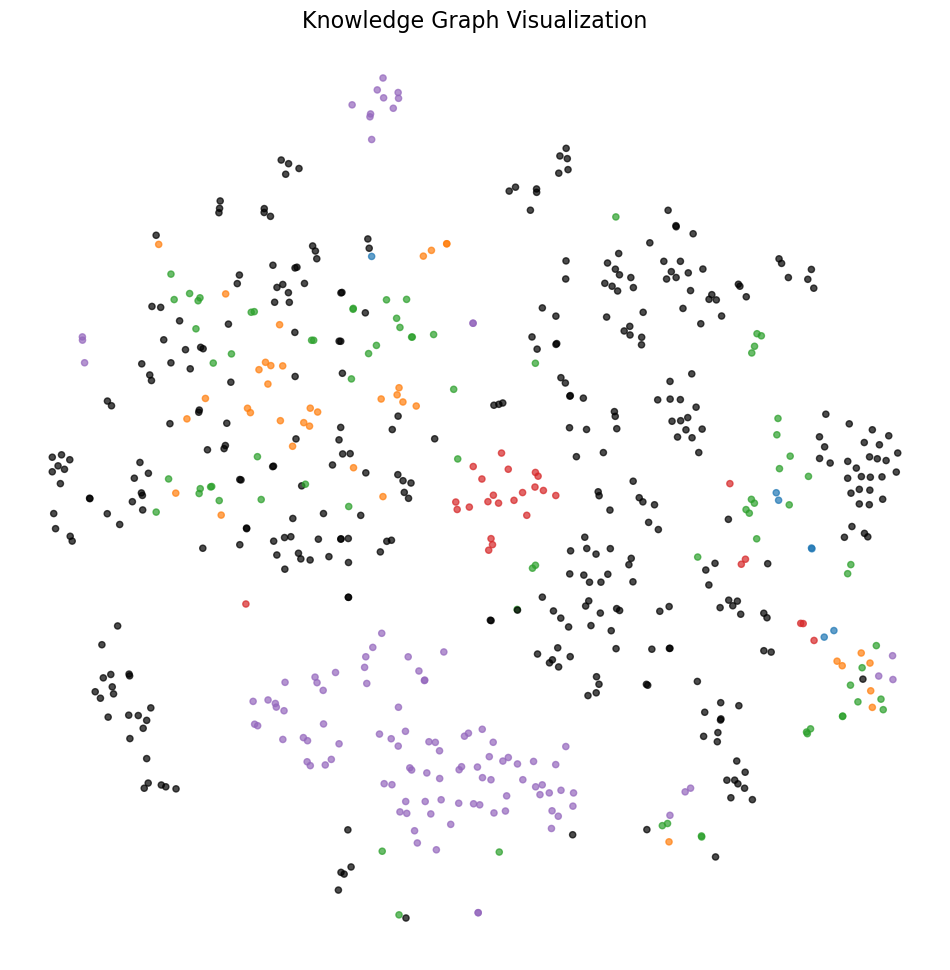

In [22]:
# Extract embeddings and reduce dimensions using t-SNE
embeddings = np.vstack(entity_embedding_df_with_communities['description_embedding'].to_numpy())
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(embeddings)

# Add t-SNE coordinates to the dataframe
entity_embedding_df_with_communities['x'] = reduced_embeddings[:, 0]
entity_embedding_df_with_communities['y'] = reduced_embeddings[:, 1]

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with attributes
for _, row in entity_embedding_df_with_communities.iterrows():
    # Select the first non-None community, or None if all are None
    community = next((comm for comm in row['communities'] if comm is not None), None)
    G.add_node(row['id'], pos=(row['x'], row['y']), community=community, type=row['type'])

# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.get_node_attributes(G, 'pos')
communities = nx.get_node_attributes(G, 'community')

# Get unique communities and assign colors
unique_communities = list(set(communities.values()))
community_colors = {comm: plt.cm.tab10(i % 10) for i, comm in enumerate(unique_communities)}
community_colors[None] = 'black'  # Assign black color for None communities

# Draw nodes with community colors
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=[community_colors[communities[node]] for node in G.nodes()],
    node_size=20,
    alpha=0.7
)

# Remove axis for cleaner visualization
plt.axis('off')
plt.title("Knowledge Graph Visualization", fontsize=16)
plt.show()

In [23]:
import networkx as nx

In [24]:
entity_embedding_df_with_communities

,id,name,type,description,human_readable_id,graph_embedding,text_unit_ids,description_embedding,communities,x,y
0,b45241d70f0e43fca764df95b2b81f77,"""PULMONARY CONSOLIDATION""","""DISEASE""","""Pulmonary Consolidation is a condition where ...",0,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.2294921875, -1.6875, 1.75, -1.1640625, 0.9...","[4, 13, None]",-9.490150,0.790568
1,4119fd06010c494caa07f439b333f4c5,"""PNEUMONIA""","""DISEASE""","Pneumonia is a condition affecting the lungs, ...",1,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.328125, -1.515625, -0.310546875, 0.3378906...","[4, 12, None]",38.081886,-12.071865
2,d3835bf3dda84ead99deadbeac5d0d7d,"""PULMONARY EDEMA""","""SYMPTOM""","The entity in question is ""PULMONARY EDEMA."" \...",2,NaN,"[409825383487bc47a51c1a2ca9cd4863, 55c6f568cf1...","[-1.6328125, -0.796875, 1.0078125, -0.05859375...","[4, 13, None]",37.156837,-9.568011
3,077d2820ae1845bcbb1803379a3d1eae,"""INFLAMMATORY EXUDATE""","""SYMPTOM""","""Inflammatory Exudate is a type of cellular ex...",3,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.94140625, -1.390625, 3.078125, -0.8671875,...","[4, 13, None]",-15.861730,6.392613
4,3671ea0dd4e84c1a9b02c5ab2c8f4bac,"""PUS""","""SYMPTOM""","""Pus is a type of liquid that can accumulate i...",4,NaN,[409825383487bc47a51c1a2ca9cd4863],"[-0.71875, -1.4140625, 3.234375, -1.4453125, 0...","[4, 13, None]",-19.495136,5.818601
...,...,...,...,...,...,...,...,...,...,...,...
623,50eabc166e8944a49197e79c32f27597,"""PULMONARY VALVE PROLAPSE""","""DISEASE""","""pulmonary valve prolapse is a condition where...",623,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-0.6875, -2.78125, 4.5, -2.40625, 0.6171875, ...","[None, None, None]",-40.035656,3.232157
624,5197a3fb02ef4677abd1900aa87e4efa,"""PULMONARY VALVE STENOSIS""","""DISEASE""","""pulmonary valve stenosis is a condition where...",624,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-1.609375, -0.0311279296875, 1.6484375, -0.08...","[None, None, None]",18.500439,-9.258334
625,887f444240bb474da23cdfb6abf7a998,"""PULMONARY VALVE REGURGITATION""","""DISEASE""","""pulmonary valve regurgitation is a condition ...",625,NaN,[55c6f568cf10a51a30fd809fc115d735],"[-1.7578125, 0.1572265625, 1.453125, -0.417968...","[None, None, None]",18.448502,-9.262715
626,5d29053f2ce74442aa1855b327ef3bb7,"""EDITORIAL BOARD""","""ORGANIZATION""","""Editorial Board is a group of medical profess...",626,NaN,[4b11e1ecc3966801dcb9328ec5ae9b32],"[-0.333984375, -0.74609375, 0.546875, -0.95703...","[None, None, None]",29.138889,16.537874


In [25]:
relationship_df

,source,target,weight,description,text_unit_ids,id,human_readable_id,source_degree,target_degree,rank
0,"""PULMONARY CONSOLIDATION""","""PNEUMONIA""",2.0,"""Pulmonary Consolidation is a necessary condit...",[409825383487bc47a51c1a2ca9cd4863],8fe58de8a04f4f8f807c77fb41829a3a,0,15,10,25
1,"""PULMONARY CONSOLIDATION""","""PULMONARY EDEMA""",2.0,"""Pulmonary Edema is a contributing factor to P...",[409825383487bc47a51c1a2ca9cd4863],a9f50861273c4bb697d868a9d049d392,1,15,1,16
2,"""PULMONARY CONSOLIDATION""","""INFLAMMATORY EXUDATE""",2.0,"""Inflammatory Exudate contributes to Pulmonary...",[409825383487bc47a51c1a2ca9cd4863],be4820f29fd942b282049fa49697b4ed,2,15,1,16
3,"""PULMONARY CONSOLIDATION""","""PUS""",2.0,"""Pus is a contributing factor to Pulmonary Con...",[409825383487bc47a51c1a2ca9cd4863],6deaefe707f84b3dbda979dea0d095ac,3,15,1,16
4,"""PULMONARY CONSOLIDATION""","""INHALED WATER""",2.0,"""Inhaled Water is a contributing factor to Pul...",[409825383487bc47a51c1a2ca9cd4863],d053ea9432a24fb192e8d6aa993b0caa,4,15,1,16
...,...,...,...,...,...,...,...,...,...,...
652,"""UPPER LIMB INJURY""","""FALL ONTO AN OUTSTRETCHED HAND""",1.0,"""upper limb injury and fall onto an outstretch...",[55c6f568cf10a51a30fd809fc115d735],f8fd3fcf650b47b2b1692506ebe77762,652,3,3,6
653,"""UPPER LIMB INJURY""","""LOWER LIMB INJURY""",1.0,"""upper limb injury and lower limb injury are c...",[55c6f568cf10a51a30fd809fc115d735],d95acc24180c47caa34114627d501592,653,3,2,5
654,"""UPPER LIMB INJURY""","""FOOT AND ANKLE INJURY""",1.0,"""upper limb injury and foot and ankle injury a...",[55c6f568cf10a51a30fd809fc115d735],f4753ab09adc42a9a52754e95440d4b9,654,3,2,5
655,"""FALL ONTO AN OUTSTRETCHED HAND""","""LOWER LIMB INJURY""",1.0,"""fall onto an outstretched hand and lower limb...",[55c6f568cf10a51a30fd809fc115d735],12f5a7c56b454a3d8aae97f65908f96b,655,3,2,5


In [26]:
relationship_df['weight'].value_counts()

weight
1.0      536
2.0       98
9.0       10
10.0       9
529.0      1
8.0        1
5.0        1
4.0        1
Name: count, dtype: int64

In [27]:
relationship_df[relationship_df['source'] == relationship_df['target']]

,source,target,weight,description,text_unit_ids,id,human_readable_id,source_degree,target_degree,rank
28,"""CARDIOMEGALY""","""CARDIOMEGALY""",529.0,Cardiomegaly is a condition characterized by a...,"[766b0808b9dbe87d015a2343431ddf68, 8d04ba9a922...",58a8fa7f29e347bdb9689b70b065a779,28,8,8,16
33,"""PERICARDIAL EFFUSION""","""PERICARDIAL EFFUSION""",9.0,"""Pericardial Effusion is a condition where flu...",[8d04ba9a922779ace59483f92e0d6c2d],5bfefaa0fce04002851733337bed714c,33,7,7,14
38,"""ANTERIOR MEDIASTINAL MASS""","""ANTERIOR MEDIASTINAL MASS""",9.0,"""Anterior Mediastinal Mass is a type of tumor ...",[8d04ba9a922779ace59483f92e0d6c2d],2489232bd2bb492babe00617e7290282,38,6,6,12
42,"""PROMINENT EPICARDIAL FAT PAD""","""PROMINENT EPICARDIAL FAT PAD""",9.0,"""Prominent Epicardial Fat Pad is a condition w...",[8d04ba9a922779ace59483f92e0d6c2d],b4c4354c8edb40db984942799fe0c8b1,42,6,6,12
46,"""ENLARGEMENT OF THE CARDIAC SILHOUETTE""","""ENLARGEMENT OF THE CARDIAC SILHOUETTE""",9.0,"""Enlargement of the Cardiac Silhouette is a ra...",[8d04ba9a922779ace59483f92e0d6c2d],70f22b1d7336492dbade94b8edefe457,46,9,9,18
49,"""INCREASED CARDIOTHORACIC RATIO""","""INCREASED CARDIOTHORACIC RATIO""",9.0,"""Increased Cardiothoracic Ratio is a radiologi...",[8d04ba9a922779ace59483f92e0d6c2d],9593428ad36746ae8af6d8ce639834ef,49,9,9,18
51,"""PERICARDIAL FAT PADS""","""PERICARDIAL FAT PADS""",9.0,"""Pericardial Fat Pads are areas of fat that ac...",[8d04ba9a922779ace59483f92e0d6c2d],1ef0c1c59ce946668ccf1a6a4f5ab7cc,51,8,8,16


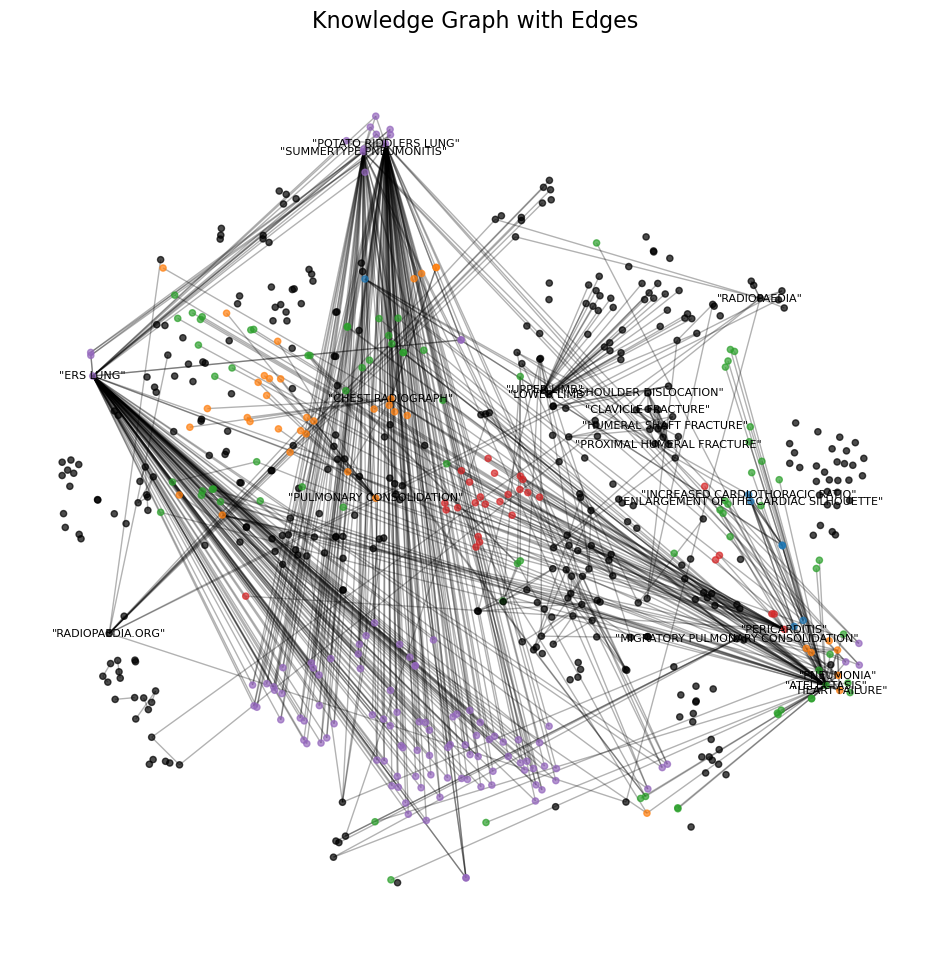

In [43]:
# STEP 1: Create a NetworkX graph
G = nx.Graph()

# STEP 2: Add nodes with attributes
for _, row in entity_embedding_df_with_communities.iterrows():
    community = next((comm for comm in row['communities'] if comm is not None), None)
    G.add_node(row['name'], pos=(row['x'], row['y']), community=community, type=row['type'])

# STEP 3: Add edges from relationship_df
for _, row in relationship_df[(relationship_df['source'] != relationship_df['target'])].iterrows():
    source = row['source']
    target = row['target']
    weight = row.get('weight', 1.0)
    if source in G.nodes and target in G.nodes:
        G.add_edge(source, target, weight=1)


# G = G.subgraph([n for n, d in G.degree() if d >= 2]).copy()

# STEP 4: Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.get_node_attributes(G, 'pos')
communities = nx.get_node_attributes(G, 'community')

# Color mapping
unique_communities = list(set(communities.values()))
community_colors = {comm: plt.cm.tab10(i % 10) for i, comm in enumerate(unique_communities)}
community_colors[None] = 'black'

# Draw nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=[community_colors[communities[node]] for node in G.nodes()],
    node_size=20,
    alpha=0.7
)

# Draw edges
nx.draw_networkx_edges(
    G,
    pos,
    alpha=0.3,
    width=[G[u][v].get('weight', 1.0) for u, v in G.edges()]
)


# Sort nodes by degree
sorted_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)

# Label only top 30 nodes by connection
top_nodes = sorted_nodes[:20]
labels = {node: node for node, _ in top_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# nx.draw_networkx_labels(
#     G,
#     pos,
#     font_size=6,
#     font_color='black',
#     verticalalignment='center',
# )

# Final plot settings
plt.axis('off')
plt.title("Knowledge Graph with Edges", fontsize=16)
plt.show()


In [29]:
# import matplotlib.pyplot as plt
# import networkx as nx
# import numpy as np

# # Create a NetworkX graph
# G = nx.Graph()

# # Add nodes with attributes (node ID is the NAME)
# for _, row in entity_embedding_df_with_communities.iterrows():
#     community = next((comm for comm in row['communities'] if comm is not None), None)
#     G.add_node(row['name'], community=community, type=row['type'])

# # Remove quotes from relationship_df if necessary
# relationship_df['source'] = relationship_df['source'].str.strip('"')
# relationship_df['target'] = relationship_df['target'].str.strip('"')

# # Add edges (skip self-loops)
# for _, row in relationship_df[relationship_df['source'] != relationship_df['target']].iterrows():
#     source = row['source']
#     target = row['target']
#     weight = row.get('weight', 1.0)
#     if source in G.nodes and target in G.nodes:
#         G.add_edge(source, target, weight=weight)

# # Keep only nodes with degree ≥ 2 for clarity
# G = G.subgraph([n for n, d in G.degree() if d >= 2]).copy()

# # Compute layout (better than t-SNE for graph structure)
# pos = nx.spring_layout(G, seed=42, k=0.2)

# # Get community colors
# communities = nx.get_node_attributes(G, 'community')
# unique_communities = sorted(set(communities.values()))
# community_colors = {comm: plt.cm.tab10(i % 10) for i, comm in enumerate(unique_communities)}
# community_colors[None] = 'black'

# # Draw edges (light and transparent)
# nx.draw_networkx_edges(
#     G, pos,
#     alpha=0.1,
#     edge_color='gray',
#     width=0.5
# )

# # Draw nodes (colored by community)
# nx.draw_networkx_nodes(
#     G,
#     pos,
#     node_color=[community_colors[communities.get(node, None)] for node in G.nodes()],
#     node_size=40,
#     alpha=0.8
# )

# # Sort nodes by degree
# sorted_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)

# # Label only top 30 nodes by connection
# top_nodes = sorted_nodes[:30]
# labels = {node: node for node, _ in top_nodes}
# nx.draw_networkx_labels(G, pos, labels, font_size=6, font_color='black')

# # Final settings
# plt.figure(figsize=(12, 12))
# plt.axis('off')
# plt.title("Readable Knowledge Graph (Top Nodes Highlighted)", fontsize=16)
# plt.show()


In [30]:
K = G = G.subgraph([n for n, d in G.degree() if d >= 2]).copy()


In [31]:
(K.nodes)

NodeView(('"INVASIVE TUMOURS"', '"SQUAMOUS CELL CARCINOMA"', '"MINIMALLY INVASIVE ADENOCARCINOMA"', '"BOWEL PERFORATION"', '"LUNGRADS"', '"ADENOCARCINOMA IN SITU AIS"', '"LOWER LIMB"', '"BRONCHIAL CARCINOID TUMOURS"', '"MYOFIBROBLASTIC STROMA ASSOCIATED WITH INVASIVE TUMOUR CELLS"', '"BOWEL DILATATION"', '"SILICOASBESTOSIS"', '"PERICARDITIS"', '"LUNG CANCER ASSOCIATED WITH CYSTIC AIRSPACES"', '"DRY ROT LUNG"', '"MINIMALLY INVASIVE TUMOURS"', '"PULMONARY STANNOSIS"', '"PERIPHERAL ARTERIAL DISEASE"', '"LUNG CANCER"', '"MICROATELECTASIS"', '"TUMOR"', '"APPENDICITIS"', '"IASLC INTERNATIONAL ASSOCIATION FOR THE STUDY OF LUNG CANCER 8TH EDITION CURRENT"', '"SUPRACONDYLAR FRACTURE"', '"NONSPECIFIC INTERSTITIAL PNEUMONIA NSIP"', '"ADENOCARCINOMA"', '"FURRIERS LUNG"', '"PULMONARY TUBERCULOSIS"', '"LYCOPERDONOSIS"', '"HUMERAL SHAFT FRACTURE"', '"NONFIBROTIC"', '"SHOULDER DISLOCATION"', '"SMALLCELL LUNG CANCER"', '"CLEAR CELL TUMOUR OF THE LUNG"', '"AORTIC ANEURYSM"', '"VARIANTS OF INVASIVE CARCI

In [44]:
final_community_df

,id,title,level,raw_community,relationship_ids,text_unit_ids
0,4,Community 4,0,4,"[8fe58de8a04f4f8f807c77fb41829a3a, a9f50861273...","[409825383487bc47a51c1a2ca9cd4863, 40982538348..."
1,2,Community 2,0,2,"[b4c7de7a824a4a71b9f52193d2f1a10d, b609f1939da...","[766b0808b9dbe87d015a2343431ddf68,8d04ba9a9227..."
2,1,Community 1,0,1,"[91deb9f152264e958d106d481ff2e1ee, 586cf02da94...","[8d04ba9a922779ace59483f92e0d6c2d,8d0a260ecf17..."
3,0,Community 0,0,0,"[32dc0b572ad84c75a64a2007788eb981, f5c11a5ac94...","[8d0a260ecf17ec4cd824a4107307331e,995d2bf87a2e..."
4,3,Community 3,0,3,"[1161272728914953b568f384d7a9f2f1, f09c82eb899...",[129d9e8442fcc426fc30903f17501f56]
5,13,Community 13,1,13,"[8fe58de8a04f4f8f807c77fb41829a3a, a9f50861273...","[409825383487bc47a51c1a2ca9cd4863, 40982538348..."
6,12,Community 12,1,12,"[b215cc33cf40434f87f284ff8f3506a4, c1ff9d8e1b8...","[409825383487bc47a51c1a2ca9cd4863,55c6f568cf10..."
7,7,Community 7,1,7,"[91deb9f152264e958d106d481ff2e1ee, 586cf02da94...","[8d04ba9a922779ace59483f92e0d6c2d,8d0a260ecf17..."
8,8,Community 8,1,8,"[909d28e443fd4e0bac189373125c8309, a87aa935dcc...","[4b11e1ecc3966801dcb9328ec5ae9b32,55c6f568cf10..."
9,5,Community 5,1,5,"[32dc0b572ad84c75a64a2007788eb981, f5c11a5ac94...","[8d0a260ecf17ec4cd824a4107307331e,995d2bf87a2e..."
